##Join the WiDS Datathon++ 2025 University Challenge by following [this link ](https://www.kaggle.com/competitions/widsdatathon2025-university) !



# WiDS Datathon Data Set Introduction

The WiDS Datathon challenge focuses on predicting age in male and female children and adolescents based on brain activity patterns to better understand how neuropsychiatric disorders like anxiety, depression, autism, and ADHD manifest differently between the sexes. By analyzing brain connectivity, researchers aim to uncover how brain networks develop uniquely in males and females during adolescence. This insight could improve early detection and personalized treatments for neuropsychiatric disorders. The challenge seeks to explore whether different factors influence age predictions between sexes, potentially shedding light on distinctive developmental patterns and risk factors.


For more domain context see the following videos:
1. [The Role of AI in Advancing Women's Brain Health Research](https://www.youtube.com/watch?si=Ae4Qrgo_4bb3nUdo&v=7X4M8dYkrvw&feature=youtu.be&themeRefresh=1) (27 minutes)
2. [Sex-Specific Differences in the Healthy and Disordered Brain](https://www.youtube.com/watch?v=KO7YI7j_d-A) (16 minutes)


#About the Dataset
The HBN dataset includes around 1,578 adolescents aged 5-21, with 63% male and 37% female. Each individual has a functional connectivity network matrix (200x200), and additional information about the individual such as sex, ethnicity, race, etc.

The dataset consists of:
1. a training folder `train_tsv` consisting of functional connectome matrices for 1,104 individuals
2. a test folder `test_tsv` consisting of functional connectome matrices for 474 individuals
3. a metadata folder `metadata` consisting of additional information about individuals in training and test sets



#Challenge Task

The task is to predict age from **2 dimensional Functional Brain Networks** (connectomes) derived from fMRI recordings during resting-state.

Along with their fMRI recordings we have metadata that will simultaniosly be used as predictive varaibles

Once you have a **prediction of the age**, your next suggested task is to explore your model, its behavior and factors that drive its accuracy, for males and females separately.

##Functional Connectivity Matrices

Functional connectivity matrices were generated using resting-state **functional Magnetic Resonance Imaging** (fMRI). fMRI relies on the principle of Blood Oxygen Level-Dependent (BOLD) contrast to measure brain activity. When a brain region becomes more active, it consumes more oxygen, prompting an increase in blood flow to that area. fMRI detects these changes, allowing researchers to infer neural activity by observing shifts in blood oxygen levels.

**Functional connectivity refers to how different regions of the brain interact with one another, as measured by the correlation between activity in paired regions.** This connectivity is often represented in the form of a matrix, where each cell reflects the correlation between activity in a specific pair of brain regions.

For more details follow this link! - [Functional connectivity matrices processed through RBC](https://www.youtube.com/watch?v=OH3QH1ol4io) (19 minutes)

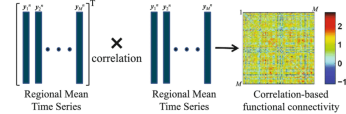

#The Goal

The goal of the challenge is to build a **model** that predicts age from these functional connectome matrices (sized according to the number of brain regions in the parcellation).

The target variable is `age`: this is the age of participant at study time, which can be found in the metadata file. You will use this to validate the accuracy of your models' predicted age.

For an example of what you will need to provide in your Kaggle submission, please look at the sample submission file `sample_submission_template.csv` in Kaggle.

By comparing predicted vs. actual age, researchers hope to uncover differences in male and female brain development, improving early intervention for mental health disorders. This challenge will highlight age-related anatomical changes that can be further linked to mental health and encourage sex-specific research. Accurate models could offer valuable insights for clinicians to better care for individuals at risk of mental health issues and identify age-specific and sex-specific targets for future treatments.




## Data Science Skills Developed:

* Python Matrix Manipulation
* Understanding correlations
* Regression model selection (statistical, machine learning)
* Regression model fitting/testing (cross validation, avoiding over/underfitting, stratification of data during training)
* Explaining factors that drive the performance of the model







##How To Access This Notebook

**Option 1: Access via Google Drive**

If you're not yet familiar with running a local Jupyter session or prefer a cloud-based approach, you can use Google Colab to access this notebook directly from your Google Drive. This is a convenient option as it does not require any local setup, and all you need is a Google account.

**Option 2: Access via Local Machine**

1. Ensure you have Anaconda installed.
2. Download this notebook (.ipynb file) to a folder on your local machine.
3. Launch Anaconda Navigator or open a terminal, navigate to the folder containing the notebook, and run jupyter notebook to open the notebook in your browser.

For a helpful resource on working with Anaconda and Jupyter notebooks, you can refer to the [From Couch to Jupyter: A Beginner’s Guide to Data Science Tools & Concepts](https://colab.research.google.com/drive/1KEwnJ7pGD4HqnZ3pd2SG8BYtRhJCS8YI#scrollTo=Vp8hEZG_6toF&line=11&uniqifier=1) tutorial, which include both an installation guide and an introduction to Jupyter notebooks.

##Download the data

Before getting started, download the data from Kaggle:

If you have Kaggle CLI installed and configured with your kaggle API credentials you can run this in your terminal:

`kaggle competitions download -c widsdatathon2025-university`

Otherwise: In the data tab on the Kaggle page there is a link to easily download all of the files as a zipped folder.

If you are planning on accessing the data via your google drive:
1. Upload the zipped folder `widsdatathon2025-university` to your google drive

2. from `google.colab import drive`: This imports the drive module from the `google.colab` package, which provides functions to interact with Google Drive.

3. `drive.mount('/content/drive')`: This command mounts your Google Drive to the specified directory (/content/drive) in the Colab environment. After executing this, you'll be able to access files stored in your Google Drive from within the Colab notebook, as if they were part of the Colab file system.

When you run this, you will be prompted to authenticate your Google account and allow Colab to access your Drive. Once authorized, all the files in your Google Drive will be available under `/content/drive/MyDrive/`.

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

## Step 1: Import the Libraries
The foremost step of data preprocessing in machine learning includes importing some libraries. A library is a set of functions that can be called and used in the algorithm.

Accessing libraries via local machine:  
* If you haven't already installed these libraries, you can do so by running the following command in your terminal:

* `pip install <library_name>` (
Replace `<library_name>` with the specific library you need to install.)

Accessing libraries via google drive:
* Google has pre-installed most of the popular python libraries so you can just run the code below


In [ ]:
import pandas as pd

#import seaborn as sns

import os
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from scipy.stats import zscore, pearsonr, uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV

import seaborn as sns

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# The following lines adjust the granularity of reporting.
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

We have two folders, `test_tsv` and `train_tsv`, before working with these we need to unzip them.

To unzip the files directly from the google notebook:

In [ ]:
!unzip /content/drive/MyDrive/test_tsv-20241008T154708Z-001.zip -d train_test_dest

In [ ]:
!unzip /content/drive/MyDrive/train_tsv-20241008T154719Z-001.zip -d train_test_dest

Our folders, `test_tsv` and `train_tsv`, containing over a thousand files. Each file represents a correlation matrix for a single patient. These matrices are symmetric, meaning the values on both sides of the diagonal are identical, so we only need to extract the upper triangle portion of each matrix (the values above and excluding the diagonal).

To process the data, for each patient file, we will:

1. Extract the values from the **upper triangle of the correlation matrix**.
2. Line up these values in a row, representing the patient’s data as a vector of correlations.

After doing this for every file in the test_tsv and train_tsv folders, we will combine the resulting rows to form two larger matrices:

1. One dataframe for the test data, with 474 rows (one for each patient).
2. Another dataframe for the train data, with 1104 rows.

#How to Process the Dataset

1) Extract a row of correlations from the Upper Triangular portion of the 2 dimensional, creating a vector of correlations for each individual.

2) Perform the above operation for the files in each of the two Training and Test folders - thereby creating Training and Test dataframes.  

3) Join Training and Test dataframes with respective metadata.

4) Now the dataset is ready for Machine Learning

5) Fit your favorite model.



This fucntions converts the square matrix into a long row of unique correlations.

Parameters:
        matrix (`pd.DataFrame` or `np.ndarray`): The square matrix to convert.

Returns:
        `pd.DataFrame`: A transposed dataframe where each entry is a unique correlation that we can later concatenate into final output dataframe.

In [ ]:
def convert_matrix_to_long_row(matrix):

    # Ensure it's a DataFrame
    if isinstance(matrix, np.ndarray):
        matrix = pd.DataFrame(matrix)

    # Get upper triangle of the matrix (excluding the diagonal)
    upper_triangle = matrix.where(np.triu(np.ones(matrix.shape), k=1).astype(bool))

    # Drop NaN values and get unique values
    unique_correlations = upper_triangle.stack().dropna().unique()

    return pd.DataFrame(unique_correlations).T

We need to create column headers for our output file based on the upper triangle matrix. Each column corresponds to a different brain region. Since this research is complex, we will use the i and j indices as our column headers for simplicity in our exploration. If you're interested in exploring these brain regions further, here is the [data dictionary](https://childmindinstitute759-my.sharepoint.com/:x:/g/personal/arianna_zuanazzi_childmind_org/EQo1oJntomtIk2TTiq3AmqMBgJ41Z0nRnHusVcPAMlFw-w?rtime=ZJVGxwnu3Eg) that includes the specific brain regions.The columns names in the data dict appear in the same positional order as the columns in the data.

Parameters:
  matrix (`pd.DataFrame` or `np.ndarray`): The matrix to get dimensions from.

Returns:
  list of column headers in the format `i_throw_j_thcolumn`,
              where `i` and `j` correspond to the row and column indices, respectively,
              for each element in the upper triangle of the matrix (excluding the diagonal).

In [ ]:
def generate_column_headers(matrix):
    rows, cols = matrix.shape
    headers = [f'{i}throw_{j}thcolumn' for i in range(rows) for j in range(cols) if i < j]
    return headers

Our Process Folder function below will iterate through each TSV file in each of our folders and convert their correlation matrices into a single row of unique correlations for each patient. The process folder function calls both of our functions above.

Parameters:
        

*  `source_folder` (str): Path to the folder containing the TSV files.
*  `output_file` (str): Path to the output TSV file.

Returns:
* A data frame in which each row is a row of unique correlations for a single patient

Exception:


*   When processing files, often, there are many errors that occur. Therefore, we must include a try - catch statement to handle these errors.

Participant ID Column:


*   While our generate_column_headers function creates most of the headers we
need, we also need a specific column for participant_id.

* This column will uniquely identify each patient, allowing us to merge this DataFrame with our metadata file accurately, ensuring that each patient's row is matched correctly with the corresponding metadata row.

* Since the participant ID is embedded in the filename, our function will extract it, create a participant_id column, and populate it for each row before adding the patient’s data to the final DataFrame.

* Each participant ID is 11 or 12 characters long and starts at the 4th index of the filename.

* For example, the file `sub-NDARZZ810LVF_ses-HBNsiteCBIC_task-rest_run-2_atlas-Schaefer2018p200n17_space-MNI152NLin6ASym_reg-36Parameter_desc-PearsonNilearn_correlations `corresponds to the participant ID `NDARZZ810LVF`.

* For each file, we’ll check the length of the participant ID, extract it from the filename, and add it to the participant_id column for the corresponding patient’s row.

In [ ]:
long_rows = []
all_headers = []

def process_folder(source_folder, output_file):
  long_rows = []
  # Iterate over items in the source folder

  for filename in os.listdir(source_folder):
      file_path = os.path.join(source_folder, filename)
      # print(filename)

      # edge cases: check if id is 12 bytes or 11
      len_id = 12 # default
      if filename[4:4+len_id][-1] == "_":
        print(filename[4:4+len_id])
        len_id = 11

      # Check if it is a file (and not a directory) and ends with .tsv
      if os.path.isfile(file_path) and filename.endswith('.tsv'):
          try:
              # Load the matrix
              matrix = pd.read_csv(file_path, sep='\t', header=None)

              # Generate column headers for this matrix
              headers = ['participant_id']+generate_column_headers(matrix)
              all_headers = headers  # Assume all files have the same matrix shape

              # Convert the matrix to a long row of unique correlations
              long_row = convert_matrix_to_long_row(matrix)

              # add patient ID
              extracted_id = filename[4:4+len_id]

              long_row.insert(0, "participant_id", extracted_id)

              # Append the long row as a new row in the results
              long_rows.append(long_row)

          except Exception as e:
              print(f"Error processing file {filename}: {e}")
      else:
          print(f"Skipping {filename} (not a file or not a TSV)")

  # need to write out the file
  out_df = pd.concat(long_rows)
  out_df.columns = headers
  out_df.to_csv(output_file, sep='\t', header=True)
  return out_df

Before we call our process folder function we need to define our source_folder and output_file

We need:
  
  
*   `source_folder` = Path to folder containing TSV files

*  `output_file` = Path to output TSV file



  

Once we define our source folder and output file for both our test and train data we need to call the process folder function twice
1) with our test data and 2) with our train data

The path to get to our `test_tsv` and `train_tsv` folders will be different for everyone

If you are connecting to those folders directly from this notebook and you unzipped them using our code above your path will look something like this:

In [ ]:
# unzipped from folder
source_folder_test = '/content/train_test_dest/test_tsv/'
output_file_test = '/content/drive/MyDrive/test_correlations.tsv'

source_folder_train = '/content/train_test_dest/train_tsv/'
output_file_train = '/content/drive/MyDrive/train_correlations.tsv'

If you have the folders on your local computer your paths will look similar to this:

In [ ]:
#source_folder_test = 'path/to/your/test/folder'
#output_file_test = 'path/to/your/test/folder/combined_correlations.tsv'

source_folder_test = '/Users/kylie/Documents/WiDs/test_tsv'
output_file_test = '/Users/kylie/Documents/WiDs/test_tsv/test_correlations.tsv'

source_folder_train = '/Users/kylie/Documents/WiDs/train_tsv'
output_file_train = '/Users/kylie/Documents/WiDs/test_tsv/train_correlations.tsv'

After defining our parameters we can call the process folder function:

In [ ]:
# calling process folder function for test data
test_big = process_folder(source_folder_test, output_file_test)

In [ ]:
# calling process folder for train data
train_big = process_folder(source_folder_train, output_file_train)

In [ ]:
# checking lengths of the train/test big dataframes to make sure there were no errors in uploads/processing

# should be: 1104 rows
print("# rows, train: ", len(train_big))
# should be: 474 rows
print("# rows, test: ", len(test_big))

**TIP**: After running process_folder once, the `test_correlations.tsv ` and `train_correlations.tsv ` files will be saved on your computer or drive. To avoid regenerating it each time, you can comment out that section of the code before running the program again.

# Step 3: Prepare for Analysis and Perform Machine Learning

Once we have built two data frames from our correlation matrices we have to read those files in. We also have metadata (excel files) that we are going to merge with our correlation matrices. You must download these files and read those files in as well.

* Find the Excel files in the `metadata` folder in Kaggle.
* Take a look at the `Data Dictionary` of metadata found in Kaggle to get a better understanding of the dataset.

Again, the path to read in those excel files depends on how you will be accessing your files



In [ ]:
# from drive
train_short=pd.read_excel("/content/drive/MyDrive/FINAL_TRAINING_METADATA_9_10_24.xlsx") # train_826Final
test_short=pd.read_excel("/content/drive/MyDrive/FINAL_TEST_METADATA_9_10_24_NO_ANSWERS.xlsx") # test_826Final

# from local computer
# train_short = pd.read_excel("/path/to/your/file/FINAL_TRAINING_METADATA_9_10_24.xlsx")
# test_short = pd.read_excel("/path/to/your/file/FINAL_TEST_METADATA_9_10_24_NO_ANSWERS.xlsx")

In [ ]:
# Checking the size of our short datframes

print(train_short.shape)
# Out[160]: (1104, 4)

print(test_short.shape)
# Out[161]: (474, 4)

####Merging the correlation matrices with the metadata excel files

We will be using pandas merge function to combine our correlation dataframes with our metadata.

The` pd.merge()` function combines two DataFrames based on a common column (`participant_id`), aligning rows with matching values and allowing you to specify to keep all rows from both (`outer`).

In [ ]:
train = pd.merge(train_big, train_short, on='participant_id', how='outer')

test = pd.merge(test_big, test_short, on='participant_id', how='outer')

In [ ]:
# print the first few rows of dataframe
print(train.head())
print(test.head())

# print the shape of dataframe
print(train.shape)
print(test.shape)

In this step, we will prepare the dataset for training and testing our model. We will define `X_train` and `X_test` to hold the feature data, which includes all columns except for the target variable, while `y_train` will hold the target data (the `age` column) from the training set.

- `X_train`: Contains all feature columns from the training set, excluding the target variable (`age`).
- `X_test`: Contains all feature columns from the test set without the `age` column
- `y_train`: Holds the target value (`age`) from the training set.
- `y_test`: Holds the target values from the first column of the test set.

This structure will be used to train and evaluate the performance of the model.

We train the model using the target values in `y_train`, which represents the age predictions. After training, we generate new predictions based on the feature data in `X_test` and `y_test`. The predictions can then be compared against the actual target values in `y_train` to evaluate the model's performance.



In [ ]:
X_train = train.iloc[:, [i for i in range(train.shape[1]) if i != 0]]
X_train = train.drop(columns=['age'])

X_test = test.iloc[:, [i for i in range(test.shape[1]) if i != 0]]

y_train = train['age']
y_test = test.iloc[:, 0]



#NA Values

We use `pd.isna()` to identify NaN (missing) values in the `X_train` and `X_test` data sets. We notice there are a good number of missing values in the metadata. This is because, in the metadata, there are surveyed data, allowing the subject to exclude information at their discretion. Not all the questions apply to everyone. In your data analysis exploration, pay attention to missing values because they can tell us something about the individual.

In [ ]:
#Check for NaN in the test dataframe
print("NaN values in test:", pd.isna(X_train).sum().sum())

#Check for NaN in the train dataframe
print("NaN values in train:", pd.isna(X_test).sum().sum())

There are a variety of different ways to handle these NA values. Feel free to research how your chosen machine-learning model handles NA values. This [website](https://www.widsworldwide.org/get-inspired/blog/a-data-scientists-deep-dive-into-the-wids-datathon/) has various ways to handle missing data.

We will demonstrate how to use a `OneHotEncoder` to handle NA values of categorical columns and how to use a `SimpleImputer` to replace NA values of numerical columns with the mean value of the column.

###STEP 1: IMPORT NECESSARIES LIBRARIES

First, we need to import the libraries that we will be using for one hot encoding. These libraries include `OneHotEncoder` for encoding categorical variables, and `SimpleImputer` for handling missing values of numerical columns.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

###Step 2: Identify Categorical Columns

Next, we identify which columns in the training data are categorical. This is important for preprocessing because categorical variables need to be encoded before they can be used in the model.

In [ ]:
# Identify categorical columns in X_train
categorical_cols = ['sex', 'study_site', 'ethnicity', 'race', 'handedness', 'parent_1_education', 'parent_2_education']


###Step 3: Handle Missing Values in Categorical Columns

We will fill any missing values in the categorical columns with the string "Unknown." This ensures that our model can handle missing data without errors.

In [ ]:
# Fill missing values in categorical columns with "Missing"
X_train.loc[:, categorical_cols] = X_train.loc[:, categorical_cols].fillna("Unknown")
X_test.loc[:, categorical_cols] = X_test.loc[:, categorical_cols].fillna("Unknown")


###Step 4: Impute Missing Values in Numerical Columns
For numerical columns, we will use a `SimpleImputer` to replace any missing values with the mean of the column. This technique allows us to retain as much data as possible without introducing bias.

In [ ]:
# Impute numerical columns with the mean value
numerical_cols = X_test.select_dtypes(include=[np.number]).columns
imputer_num = SimpleImputer(strategy='mean')

# Fit the imputer on X_train and transform both X_train and X_test
X_train.loc[:, numerical_cols] = imputer_num.fit_transform(X_train[numerical_cols])
X_test.loc[:, numerical_cols] = imputer_num.transform(X_test[numerical_cols])



###Step 5: Convert Categorical Columns to Strings

To ensure there are no mixed data types, we convert all categorical columns to string type. This prevents issues during encoding.

In [ ]:
# Convert categorical columns to strings to avoid mixed types
X_train.loc[:, categorical_cols] = X_train.loc[:, categorical_cols].astype(str)
X_test.loc[:, categorical_cols] = X_test.loc[:, categorical_cols].astype(str)


### Step 6: One-Hot Encoding of Categorical Variables

We apply one-hot encoding to the categorical columns to convert them into a format suitable for our linear regression model. This encoding creates new binary columns for each category, allowing the model to interpret categorical variables correctly.

**Why using One-Hot Encoding?**
One-hot encoding (OHE) is a machine learning technique that converts categorical data into numerical values so that it can be used in machine learning models.

In [ ]:

# Apply One-Hot Encoding to the categorical columns
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')  # drop='first' to avoid multicollinearity


In [ ]:
# Fit the encoder on X_train and transform both X_train and X_test
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])


NOTE:  When applying One-Hot Encoding to the test dataset, you may encounter the following warning:

`UserWarning: Found unknown categories in columns [0, 1, 4] during transform. These unknown categories will be encoded as all zeros.`

**Explanation:**
This warning occurs because certain categories present in the test dataset were not found in the training dataset. In One-Hot Encoding, each unique category in the training set is assigned a column, and if the test set contains categories not seen during training, those columns will not have corresponding values. Instead, they will be encoded as all zeros in the output.

**Why This Is Acceptable:**
While it may seem concerning, representing these unknown categories as zeros is informative. It indicates that these categories were not part of the training data, which could suggest that they are either rare or emerging categories.

###Step 8: Convert Encoded Data to DataFrames

The encoded data is in a sparse matrix format. We will convert it into a DataFrame for easier manipulation and to combine it with the numerical data.

In [ ]:
# Convert encoded columns into DataFrames
X_train_encoded_dense = X_train_encoded.todense()
X_test_encoded_dense = X_test_encoded.todense()
X_train_encoded_df = pd.DataFrame(X_train_encoded_dense, columns=encoder.get_feature_names_out(categorical_cols))
X_test_encoded_df = pd.DataFrame(X_test_encoded_dense, columns=encoder.get_feature_names_out(categorical_cols))


###Step 9: Combine Encoded and Numerical Columns

Now, we will drop the original categorical columns from our feature sets and combine the encoded categorical columns with the remaining numerical columns.

In [ ]:
# Drop original categorical columns from X_train and X_test
X_train_numerical = X_train.drop(categorical_cols, axis=1).reset_index(drop=True)
X_test_numerical = X_test.drop(categorical_cols, axis=1).reset_index(drop=True)


In [ ]:
# Combine the encoded categorical columns with the numerical columns
X_train_final = pd.concat([X_train_encoded_df, X_train_numerical], axis=1)
X_test_final = pd.concat([X_test_encoded_df, X_test_numerical], axis=1)


# Step 4: Perform Machine Learning

Now that we have our complete endcoded dataframe we are ready to fit it to our favorite model.


1.  Linear Regression - is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. It predicts the dependent variable's value by finding the line that minimizes the difference (error) between predicted and actual values.
2. To be able to produce numerical values for predicted age we can use a linear regression model. We will demonstrate a linear regression model from the `sklearn class`
3. You can choose any model you like. Experiment with several models and evaluate their performance to determine the best fit!

##LINEAR REGRESSION

### Step 1: Import Necessary libraries

Sklearn has a `LinearRegression` extension for fitting our model

In [ ]:
from sklearn.linear_model import LinearRegression

###Step 2: Initialize and Fit the Linear Regression Model

We will create an instance of the `LinearRegression` model and fit it using the processed training data (`X_train_final` and `y_train`).

In [ ]:
model = LinearRegression()

In [ ]:
# Exclude non-numeric columns
X_train_final = X_train_final.select_dtypes(exclude=['object'])

# Ensure X_train_final aligns with y_train
X_train_final = X_train_final.loc[y_train.index]

In [ ]:
model.fit(X_train_final, y_train)

###Step 3: Make Predictions

After fitting the model, we will make predictions using the processed test data (`X_test_final`). We take the absolute values of the predictions since age cannot be negative.

In [ ]:
# Make predictions and take the absolute value - age is always positive
y_pred = abs(model.predict(X_test_final))

# Deeper Exploration and Discussion

This dataset comprises very rich and deep correlation data. As such, there are multiple avenues for further research. Here are some possible avenues for further study:

* What insights have you gained about any differences in how male and female individuals’ ages are predicted?
* What brain regions or functional connections between regions are important in the prediction of age? [Data Dictionary for specific regions of the brain](https://docs.google.com/spreadsheets/d/10cFUj8whV87ATjz1IuqTHxiZg-m7zQ47bKqh0NtB3aw/edit?gid=0#gid=0)

* Are the brain regions/functional connections between pairs of regions that are important in females also those that are important in males?
* If one had access to other types of brain network data (e.g. structural vs functional connections) how could multi-modal connectome data be combined to perform age prediction?
* Does puberty affect the accuracy of the age prediction model, i.e. are female and male individuals’ ages predicted with similar accuracy before puberty and different accuracies after puberty?
* Can you distill the explanatory variables into a handful of variables that are the main drivers of the outcome? In this context, have you explored principal components analysis (PCA)? What about Principal Components Regression?


Our encoding split up our sex column into sex_Male and sex_Unknown column with binary values. To split our datafram by sex to predict for just female or just male we are going to use these columns.

###What insights have you gained about any differences in how male and female individuals’ ages are predicted

When dealing with imbalanced data, like our dataset with 63% male and 37% female, it's essential to consider how this imbalance might affect model performance.

**Why Account for Imbalanced Data?**

1. **Bias Toward Majority Class**: Machine learning models trained on imbalanced data tend to perform better on the majority class (in this case, males) and may underperform on the minority class (females). This is because the model "sees" more examples of the majority class, so it learns to predict that class more effectively.

2. **Evaluating Performance Equitably**: Without adjustments, metrics like accuracy may reflect strong performance due to the majority class alone, while performance on the minority class remains poor. Using metrics like F1 score, precision, recall, or implementing balanced accuracy can help evaluate how well the model predicts each class.


In [ ]:
# Female only data frame
female_X_train = X_train_final[X_train_final['sex_Male'] == 0]
female_X_test = X_test_final[X_test_final['sex_Male'] == 0]

#Female age predictions
y_train_female = train[train['sex'] == 'Female']['age']

# Male only data frame
male_X_train = X_train_final[X_train_final['sex_Male'] ==  1]
male_X_test = X_test_final[X_test_final['sex_Male'] ==  1]

#Male age predictions
y_train_male = train[train['sex'] == 'Male']['age']

model.fit(female_X_train, y_train_female)
model.fit(male_X_train, y_train_male)


In [ ]:
model.fit(female_X_train, y_train_female)

In [ ]:
model.fit(male_X_train, y_train_male)

**Cross-Validation (e.g., K-Fold Cross-Validation):**
K-Fold Cross-Validation divides your training data into `k `subsets (folds). The model is trained on `k-1` folds and evaluated on the remaining fold. This is done for each fold, and the evaluation metrics are averaged across all folds.

This method ensures you get an estimate of the model’s generalization performance without needing a separate test set.
In Python, you can use` cross_val_score` from `sklearn.model_selection` to perform `cross-validation`.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores_male = cross_val_score(model, male_X_train, y_train_male, cv=5)  # 5-fold cross-validation
print("Cross-validated scores for Male:", scores_male)

#Cross-validated scores for Male: [0.55168982 0.59001248 0.54898882 0.53374846 0.58728651]

In [ ]:
scores_female = cross_val_score(model, female_X_train, y_train_female, cv=5)  # 5-fold cross-validation
print("Cross-validated scores for Female:", scores_female)

#Cross-validated scores for Female: [0.6302941  0.66614859 0.48619109 0.43497435 0.46675068]

Each value in the arrays represents the model’s performance on one of the five test sets. To get a single measure of performance, you can calculate the mean of these scores for each group.

In [ ]:
male_avg_score = scores_male.mean()
female_avg_score = scores_female.mean()
print("Average cross-validated score for Male:", male_avg_score)
print("Average cross-validated score for Female:", female_avg_score)

#Average cross-validated score for Males: 0.562345219865273
#Average cross-validated score for Females: 0.5368717597159517

##What are the labels of the Shaefer atlas?

When looking at what brain regions or functional connections between regions are important in the prediction of age, please refer to [this](https://docs.google.com/spreadsheets/d/10cFUj8whV87ATjz1IuqTHxiZg-m7zQ47bKqh0NtB3aw/edit?gid=0#gid=0) mapping of each region number to its corresponding region name for the Schaefer200 atlas.

Several regions/parcels can be part of larger functional networks. When a functional networks is large, it is expected to split that region into two or more parcellations. Considering the parcellation we used (Shaefer200), the brain region named “extrastriate cortex” (which is part of the central visual network) was divided into <font color = 'red'> two smaller regions/parcels</font>: `17Networks_LH_VisCent_ExtStr_1` and `17Networks_LH_VisCent_ExtStr_2`.

In the file linked above, RAS (Right, Anterior, Superior) refers to the anatomical coordinate system used, which contains the coordinates for the center of each parcellation. RAS means that the first dimension (X) points towards the right hand side of the head, the second dimension (Y) points towards the Anterior aspect of the head, and the third dimension (Z) points towards the top of the head. The directions are considered to be from the subject’s perspective.


 The dictionary contains the names of each of the 200 brain parcels (locations) in order of how they appear in the connectome matrix. For example, in our final data frame, the column `1throw_7thcolumn` captures the correlation between `17Networks_LH_VisCent_ExtStr_1` (first row) and `17Networks_LH_VisPeri_ExtStrInf_1` (7th column). Details on what the headers’ names like ‘17Networks_LH_VisCent_ExtStr_1’  refer to can be found in the dictionary.

<font color='green'>**FEATURE IMPORTANCE**</font>  can be analyzed at three different levels: **connections between pairs of regions**, **individual parcels/regions**, or **entire networks**. When reporting feature importance at the regional or network level after running a machine learning model, it is necessary to aggregate pairwise feature importances into a unified metric that represents the importance of each region or network.

This aggregation can be achieved through various methods. Common techniques include **Lasso Regression** and **Random Forest Regression**:
1. <font color='green'>**Lasso Regression**</font> uses regularization to prioritize the most relevant features by shrinking less important coefficients to zero.
2. When building each tree in the forest, the <font color='green'>**Random Forest Regression**</font> algorithm selects the feature that provides the most information gain (decrease in impurity) at each split, and this information gain is accumulated across all trees for each feature, resulting in a variable importance score.

To learn more about the reliability of feature importance metrics in predictive models in the context of neuroimaging and behavioral data read this paper: [Relationship between prediction accuracy and feature importance reliability: An empirical and theoretical study](https://pubmed.ncbi.nlm.nih.gov/37088322/). Additionally to dive more in depth about Network-level feature importance and sex differences in network-level feature importance look at this paper: [Shared functional connections within and between cortical networks predict cognitive abilities in adult males and females](https://onlinelibrary.wiley.com/doi/10.1002/hbm.25709).


Alternatively, feature importance for regions or parcels can be derived by **summing the positive and negative model coefficients separately for all pairwise connections associated with a specific region or parcel**. Similarly, for networks, the positive and negative coefficients can be summed for connections within or between regions belonging to specific networks or network pairs. Separating the sums allows for a more nuanced interpretation. You can see whether a region's connections predominantly contribute positively or negatively, which provides insights into its overall role in the network.

By applying these methods, the aggregated importance values provide a more interpretable understanding of which regions or networks contribute most significantly to the predictive model.


## Lasso Regression

`Lasso Regression` (Least Absolute Shrinkage and Selection Operator) is a type of linear regression that incorporates `L1 regularization`. Lasso adds a penalty equal to the absolute value of the coefficients to the loss function.
This penalty term encourages smaller coefficients and can force some coefficients to be exactly zero, effectively excluding less important features from the model.

Why are we using lasso regression for feature selection?

Lasso can automatically select features by driving less relevant coefficients to zero.
This makes it especially useful when you have a large number of predictors and need to identify the most important ones.

After fitting the Lasso regression model, we can create a new DataFrame containing the column names and their corresponding coefficients. Higher coefficients indicate greater feature importance, while lower coefficients suggest weaker importance.

By analyzing this DataFrame, we can identify which brain region parcels were most influential in the model's predictions of age.

To perform Lasso Regression in Python, you can use the Lasso class from `sklearn.linear_model`

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
# parameters to be tested on GridSearchCV
params = {"alpha": np.logspace(-4, 1, 50)}

Ensure your data is properly scaled, as Lasso is sensitive to feature magnitudes. Consider using StandardScaler to standardize your features if needed.

In [ ]:
names=X_train_final.columns

#selectign only numerical columns
df = X_train.select_dtypes(include=["number"])

scaler = StandardScaler()
X_train_final = scaler.fit_transform(df)

Before fitting the lasso model we must figure out the best value for alpha:

`LassoCV` is a variant of Lasso Regression that uses cross-validation to automatically determine the optimal value for the regularization parameter
alpha. Instead of manually tuning alpha, LassoCV evaluates multiple candidate values of alpha and selects the one that minimizes the cross-validated prediction error.

Step 1: Defining Cross-Validation (CV) Splits

Purpose: The `KFold` function splits the dataset into 5 folds (groups), ensuring a balanced validation process.
- `shuffle=True`: Randomizes the data before splitting into folds
- `random_state=42`: Ensures that the data shuffling is replicable.

Cross-validation improves model reliability by training and validating on multiple data subsets.


In [ ]:
# Number of Folds and adding the random state for replication
kf=KFold(n_splits=5,shuffle=True, random_state=42)

Step 2: Initializing the Lasso Regression Model

`max_iter=100`: Limits the number of optimization iterations.

In [ ]:
# Initializing the Model
lasso = Lasso(max_iter=100)

Step 3: Setting Up Hyperparameter Tuning

`GridSearchCV`: Automates hyperparameter tuning by testing multiple combinations of parameters.
- `lasso`: The model being tuned.
- `param_grid=params`: A dictionary specifying the hyperparameters and their possible values (e.g., different values of alpha for regularization strength).
- `cv=kf`: Uses the defined 5-fold cross-validation.
- `verbose=2`: Displays detailed progress during the tuning process.

In [ ]:
# GridSearchCV with model, params and folds.
lasso_cv = GridSearchCV(lasso, param_grid=params, cv=kf, verbose=2)

Step 4: Training and Finding the Best Hyperparameters

Trains the model on the training dataset (`X_train_final` and `y_train`) for each combination of hyperparameters.

Displays the best hyperparameters found during tuning (e.g., the optimal alpha value for regularization).

In [ ]:
lasso_cv.fit(X_train_final, y_train)

print("Best Params {}".format(lasso_cv.best_params_)) #get best alpha value

Step 5: Building the Final Model with Best Parameters

- Final Model: The Lasso model is re-initialized with the optimal `alpha` value from `GridSearchCV`.
- Trains the final model on the entire training dataset (`X_train_final`, `y_train`).

In [ ]:
# calling the model with the best parameter
lasso1 = Lasso(alpha= 0.07196856730011521) #this is the alpha we got from fitting the model!
lasso1.fit(X_train_final, y_train)


After building a Lasso regression model, we can create a DataFrame that pairs the column names with their corresponding coefficients from the model. These coefficients represent the importance of each feature, as higher coefficients indicate a greater influence on the model's predictions, while lower coefficients suggest a minimal contribution.

In [ ]:
# Create a DataFrame of coefficients
names=df.columns
X_train_final_df = pd.DataFrame(X_train_final, columns=names)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)

coefficients_df = pd.DataFrame({'Feature': names, 'Coefficient': lasso1_coef})


We want to sort these coefficients in descending order to display the largest values at the top.

In [ ]:
coefficients = coefficients_df[coefficients_df['Coefficient'] > 0.10]
sorted_coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("\nCoefficients greater than 0.10 :")
print(sorted_coefficients)